# Assignment group 4: Machine learning and regression

#### Kiana Montazeri

## Module A _(49 pts)_ Exploring dimensionality reduction through image classification
__Data.__ For this module we'll be working with the MNIST dataset of 28 x 28 black and white pixel-images of hand-written numbers, which was put together some folks at NYU, Google Labs, and Microsoft Research:

- http://yann.lecun.com/exdb/mnist/

For simplicity, we won't be access these data from the producers' site, since it's presented in a compressed format that requires special code (there's a [python module](https://pypi.org/project/python-mnist/), if you're interested).

The MNIST dataset has become extremely important to the ML community over the years as a standard dataset for image classification that has a very clear 'true' label set (unlike others, e.g., like sentiment classification in __Module B__). For ML in general, it's very important to have datasets over which the community can compare results, hence compare algorithms without the uncertainty of data variation.

In [37]:
#Libraries in use:
from pprint import pprint
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as  pd
import numpy as np
from sklearn import datasets
from sklearn.datasets import fetch_openml
# if it's not working: update sklearn using this command >> pip install scikit-learn --upgrade
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from datetime import datetime

__A1.__ _(5 pts_) To load the MNIST data, we're actually going to be able to use `sklearn`! Since the data have become such a standard, and `sklearn` is _the_ standard ML library it has an `sklearn.datasets.fetch_openml()` method that we can use to download datasets:

- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html

So, using this method, load the MNIST data as `mnist`, setting `name='mnist_784'`, `version=1`, and `cache=True` as arguments. Note: the latter two arguments 1) standardize our verson and 2) store the downloaded data on your local machine. If you're ever curious, the data should wind up in `'~/scikit_learn_data/'`.

Once you've loaded `mnist`, inspect its `.data` attribute. In particular, print and discuss the size and type (number of features and their values) of a a single record `mnist.data[i]` for some `i`, and describe in the response box below how these data appear represent a black and white image.

<font color=blue>Data consists of $70000$ handwritten $28 \times 28$ pixel images. Aach pixel of the image is represented by a value between 0 and 255, where 0 is black, 255 is white and anything in between is a different shade of grey.</font>

In [2]:
mnist = fetch_openml(name='mnist_784', version=1, cache=True)

In [3]:
type(mnist.data)

numpy.ndarray

In [4]:
mnist.data.shape

(70000, 784)

In [24]:
mnist.data[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [6]:
mnist.data[1].shape

(784,)

__A2.__ _(7 pts)_ Spoiler alert! Each image record is represented as an integer `np.array` of size `(784,)` (you still have to show that above). Each integer represents a pixel, with shade of gray encoded as an intensity from 0&ndash;255, i.e., white&ndash;black. Notice how 28 divides 784 evenly? That's because the rows of the image have been 'stacked' into a single row of data!

Since we're going to want to visualize these images, e.g., to check and see why our algorithm fails where. But in order to do this, we're going to need to build a helper function that pre-processes a given record into it's representation as a `(28,28)` matrix of rows. In particular, write a function called `unstack(x)` that accepts any image/record `x` and outputs an `np.array()` of size `(28, 28)` containing the pixel values such that the top row holds pixels 0&ndash;27, the second contains pixels 28&ndash;55, etc.

[Hint. `numpy.array`s have a `.reshape()` method that can do the unstacking for you, check it out!]

When complete, print the result from application to the same record as observed in __A1__. Can you see any shape?

In [7]:
def unstack(x):
    x_unstacked = x.reshape(28, 28)
    return x_unstacked

In [8]:
mnist_data_1_unstacked = unstack(mnist.data[1])

In [9]:
mnist_data_1_unstacked.shape

(28, 28)

In [10]:
mnist_data_1_unstacked #it doesnt fit in the whole area. I still cant see the number!

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

__A3.__ _(3 pts)_ Now that we've got the ability to unstack our images, let's visualize them. In particular, write a function called `show_pixels(px)` that 

1. accepts an unstacked collection of pixels, `px`, and
2. utilizes `plt.imshow()` on `px` with an appropriate `cmap` argument to express the pictures.

When complete, exhibit your function's output on your same chosen example from __A1&ndash;A3__. You should definitely be able to tell what number the picture represents now!

In [11]:
def show_pixels(px):
    unstacked = unstack(px)
    im = plt.imshow(unstacked, cmap='gray')
    plt.show()

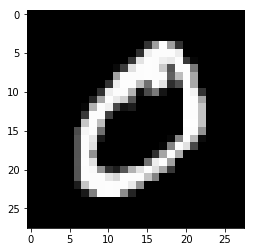

In [12]:
show_pixels(mnist.data[1]) #it's zero :D

__A4.__ _(2 pts)_ Now let's start our analysis by exploring how PCA's ability to reduce dimensionality can be understood as a way to _reduce the resolutiuon of data_. So, start by importing `PCA` from `sklearn.decomposition`, and create three instances: `pca5`, `pca50`, and `pca75`, which will reduce dimensionality to explain only 5%, 50%, and 75% of the dataset's variance, respectively. Then for each, run `.fit(mnist.data)` to train a `PCA` model.

In [13]:
## perform PCA on our data
pca5 = PCA(n_components=0.05)
pca50 = PCA(n_components=0.5)
pca75 = PCA(n_components=0.75)
pca5.fit(mnist.data)
pca50.fit(mnist.data)
pca75.fit(mnist.data)

PCA(copy=True, iterated_power='auto', n_components=0.75, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

__A5.__ _(4 pts)_ Now, using your `pca5`, `pca50`, and `pca75` models, create a function called `deresolve(x, pca)` that accepts an image/record `x` from `mnist.data` and a trained `pca` model to construct an approximation, `deresolved` image. This can be done using `pca.transform()` to construct the dimensionally `reduced` representation of an image as output, which can then be passed to the `pca.inverse_transform()` function to create the `deresolved` pixels, which should be `return`ed by the function.

When complete, pass the output of your function's application to your chosen example image to your `show_pixels()` function for each of the `pca5`, `pca50`, and `pca75` models and comment in the response box below how these pca models are abstracting the key features of the data, i.e., shapes of numbers.

Note: the `pca.transform()` method expects an array of records as input, so if your chosen example image is `mnist.data[i]`, then you'll have to pass `[mnist.data[i]]` to the `.transform()` function to get it to work!

<font color=blue>Each model uses only a percentile of the data to train. The overall picture is clear but the clarirt of the number zero increases with more data in use for the model</font>

In [14]:
def deresolve(x, pca):
    reduced = pca.transform([x])
    deresolved_x = pca.inverse_transform(reduced)
    return deresolved_x

In [15]:
deresolved_5 = deresolve(mnist.data[1], pca5)
deresolved_50 = deresolve(mnist.data[1], pca50)
deresolved_75 = deresolve(mnist.data[1], pca75)

In [16]:
deresolved_5.shape, deresolved_50.shape, deresolved_75.shape

((1, 784), (1, 784), (1, 784))

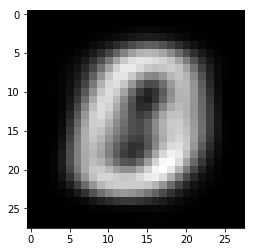

In [17]:
show_pixels(deresolved_5)

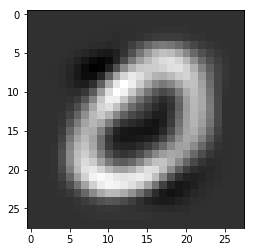

In [18]:
show_pixels(deresolved_50)

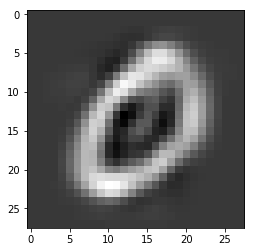

In [19]:
show_pixels(deresolved_75)

__A6.__ _(3 pts)_ Before we get too deep in with analysis, it would be a good idea to separate our data by training and testing. So, use `train_test_split` from `sklearn.model_selection` to split up the data, and store them as `train`, `test`, `train_labels`, `test_labels`. Be sure to select an appropriate `test_size` and `random_state` for the split, and justify these settings in the response box below. 

<font color=blue>Random state will make the process reproducable by setting a random seed. The split size is 80% and 20%. We can have 5 fold cross validation.</font>

In [20]:
train, test, train_labels, test_labels = train_test_split(
    mnist.data, mnist.target, test_size=0.2, random_state=42)

__A7.__ _(3 pts)_ Now that we have access to `sklearn` we should use it for all it's worth! We'll do well to standardize our data to move forward with classificaition, but since `sklearn` has the `StandardScaler` function from `sklearn.processing` we can use that! In particular, import `StandardScalar` and `.fit()` a model to the `train` portion of the data set. Then, use the `.transform()` method on the resulting trained standardization object to produce standardized versions of `train` and `test`, calling them `train_std` and `test_std`, respectively.

In [21]:
scalertrain = StandardScaler().fit(train)
scalertest = StandardScaler().fit(test)
train_std = scalertrain.transform(train)
test_std = scalertrain.transform(test)

__A8.__ _(3 pts)_ Now it's time to apply PCA for the purposes of classification! However, we'll have to re-train a PCA model _on the `train`ing set_ (only) for our desired variance percentage that we'd like to retain. So, write a function called `reduce(percentage)` that:

1. creates a `PCA` instance for the desired `percentage` variance explained,
2. runs `.fit()` on the standardized `train`ing data `train_std`,
3. applies the resulting `.transform()` method to both `train_std` and `test_std`, returning the results.

When complete, apply this function using a `percentage` for `95%` of the variance explained and store the outputs as `train_std_pca`, and `test_std_pca`.

In [25]:
def reduce(percentage):
    pca = PCA(n_components=percentage)
    pca.fit(train_std)
    train_std_pca = pca.transform(train_std)
    test_std_pca = pca.transform(test_std)
    return train_std_pca, test_std_pca

In [26]:
train_std_pca, test_std_pca = reduce(0.95)

__A9.__ _(7 pts)_ Now it's time to train a classifier. In particular, your job here is to write a function called `train_model(train_dat, train_lbl)` that accepts training data (however pre-processed) with labels and trains. To do this, utilize `LogisticRegression` from `sklearn.linear_model`, but be sure to utilize the following arguments for initializing the model's instance: 
- `solver = 'lbfgs'`,
- `max_iter=1000`, and 
- `multi_class='ovr'`. 

Once you've initialized the logistic regression model, apply the `.fit()` method to the data input to your function and return the resulting classifier object. When this function is complete, apply it to the dimensionally reduced `train_std_pca` data output in __A8__ and store the resulting classifier as `clf`.

Note: The first two arguments to `LogisticRegression` specify the `solver` being used to optimize the regression (as in __Chapter 7__), and the maximum number of iterations to optimize over. However, the `multi_class='ovr'` argument is new to us! In particular, since we're trying to pick one from 10 discrete labels, i.e., `'0'`, `'1'`, `'2'`, etc., for each input record this is called a _multi-class_ classification problem. Since logistic regression isn't built for this kind of application there has to be a way to modify/enhance the algorithm to support it. As it turns out there's one way in which we can modify any binary classifier into a multi-class classifier, which is what `multi_class='ovr'` does. In particular, `'ovr'` indicates the _one vs. rest_ strategy which trains as many classifiers as there are possible outcomes in the labels. Each of the trained classifiers is trained to positively predict a given label, e.g., `'7'`, and negatively predict against all other, e.g., `not '7'`. All classifiers (10 for us) are then applied to each test record, and the classifier that offers the best positive prediction probability is then corresponds to the predicted label for the record. That's it! While the one vs. rest procedure is _general_ in its ability to convert a binary classifier into a multi-class classifier, it is a limited framework for multi-class classification, and more-precise models are generally those that do best. To see a derived multi-class logistic regression model, check out [Multinomial logistic regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression), which can be applied by setting `solver = 'multinomial'`.

In [28]:
def train_model(train_dat, train_lbl):
    LogReg = LogisticRegression(solver='lbfgs', max_iter = 1000, multi_class='ovr')
    # Create an instance of Logistic Regression Classifier and fit the data.
    clf = LogReg.fit(train_dat, train_lbl)
    return clf

In [29]:
clf = train_model(train_std_pca, train_labels)

__A10.__ _(4 pts)_ Now that we have a trained classifier it's time to explore its application to the test set. For this, utilize the `clf.predict()` method on the `test_std_pca` data, storing the result as `test_labels_predicted`. Since this is _not_ a binary classification problem, we likewise can't use binary classification evaluation metrics (i.e., precision, recall, and $F_1$), and so have to fall back on accuracy. So import `accuracy_score` from `sklearn.metrics` and apply it to the pair of `test_labels_predicted` and `test_labels` and report your accuracy. When this is done, go on to compare the first 25 values of `test_labels_predicted` and `test_labels` to see how the model did.  Then, in the response box below discuss
1. The types of errors being made by the model, and
2. how this output differs from the context of a binary classification problem.

Note: for 2, the point to discuss is not over prediction of 0s and 1s, but rather the number of different possible labels that the algorithm is responsible for predicting. This is important, as logistic regression as we've discussed is technically only set up to support binary classification!

<font color=blue>[Refer to here!](https://en.wikipedia.org/wiki/Uncertainty_quantification) Error come from either intrinsic uncertainty or epistemic uncertainty. Intrinsic uncertainty is when, for data in the training set, data points with very similar feature vectors have targets with substantially different values. Collecting more data will never help a model reduce this type of uncertainty. Epistemic uncertainty is also known as systematic uncertainty, and is due to things one could in principle know but doesn't in practice. This may be because a measurement is not accurate, because the model neglects certain effects, or because particular data has been deliberately hidden.
<br><br>
Since we have more than two classes for the output, the accuracy of random selection would be less than 50 % of times i.e only 10 % of the times random slection will result in correct prediction.
</font>

In [31]:
test_labels_predicted = clf.predict(test_std_pca)

In [32]:
score = accuracy_score(test_labels_predicted, test_labels)

In [33]:
print(score) #almost 92 percent true predictions

0.9172142857142858


In [35]:
print(test_labels_predicted[:25])
print(test_labels[:25])

['8' '4' '8' '7' '7' '0' '6' '2' '7' '4' '3' '9' '9' '8' '2' '5' '9' '1'
 '7' '8' '0' '0' '0' '3' '6']
['8' '4' '8' '7' '7' '0' '6' '2' '7' '4' '3' '9' '9' '8' '2' '5' '9' '1'
 '7' '8' '0' '0' '0' '3' '6']


__A11.__ _(8 pts)_ Now that we have our training and testing pipline in place and we've seen what sklearn and logistic regresion can do for image classification, let's explore how `PCA` affects the process. We'll be evaluating how much time each implementation affects the run time, so the first thing you'll want to do is import `datetime`. Following this, write a loop over `portion` values `0.1`, `0.2`, ..., `0.9`. For each `portion`:
1. records an initial `datetime.datetime.now()` timestamp as `start`;
2. applies your `reduce()` function with the `portion` specified and store the resulting data as `train_std_pca`, `test_std_pca`;
3. passes the outputs from 2 to your `train_model()` function and store the classifier as `clf`;
4. applies the `clf.predict()` method  to the transformed `test_std_pca` data and store the resulting predictions as `test_labels_predicted`,;
5. records a final `datetime.datetime.now()` timestamp as `finish`; and
6. `print`s the model `accuracy_score` and execution time (computed as `finish-start`).

When this is complete, you should have evaluations for each level of dimensionality reduction provided by PCA. With these in front of you, discuss the effects of PCA on run time and accuracy in the response box below. In particular, at which level of PCA-resolution do you think the best model is produced, considering both accuracy and run time?

<font color=blue>With low percentage of data the accuracy is low and with high portions the accuracy and execution time increases. We should find the optimal point where the time is reasonable and the accuracy is high. It seems like the $0.8$ is the most accurate(91%) yet the execution time is still not very long.</font>

In [40]:
portion = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for eachportion in portion:
    start = datetime.now()
    train_std_pca, test_std_pca = reduce(eachportion)
    clf = train_model(train_std_pca, train_labels)
    test_labels_predicted = clf.predict(test_std_pca)
    finish = datetime.now()
    score = accuracy_score(test_labels_predicted, test_labels)
    exe_time = finish-start
    print(score, exe_time)

0.4630714285714286 0:00:10.894018
0.7121428571428572 0:00:11.027282
0.7994285714285714 0:00:09.646877
0.8605 0:00:13.527922
0.8896428571428572 0:00:13.794598
0.8983571428571429 0:00:19.205313
0.9081428571428571 0:00:41.803250
0.9146428571428571 0:01:04.041237
0.9178571428571428 0:01:29.953042
